In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [14]:
################Business understanding - Question 1################
# Does host behaviour affect the review ratings he receives?

In [15]:
# Data Understanding
df = pd.read_csv('./Boston-listings.csv')
df.head()
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

In [16]:
################Data preparation################
def percentage(x):
    return x/100.0

def clean_data_q1(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['review_scores_rating'], axis=0)
    y = df['review_scores_rating']
    y = y.apply(percentage)
    
    #Drop respondent and expected salary columns  
    df = df[['host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_has_profile_pic']]
    
    # Remove % from 'host_response_rate' and 'host_acceptance_rate'
    df['host_response_rate'] = df['host_response_rate'].str.replace(r'%', r'.0').astype('float') 
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace(r'%', r'.0').astype('float') 
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        
    X = df
    return X, y

#Use the function to create X and y
X, y = clean_data_q1(df) 


In [17]:
################Modeling################
# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.15, random_state=42)
# pd.set_option("max_rows", None)

lm_2_model = LinearRegression(normalize=True)
# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_train, y_train)
except Exception as e:
    print(e)

# Predictions here
y_test_preds = lm_2_model.predict(X_test)
r2_test = r2_score(y_test, y_test_preds)
print("R2 score =",r2_test)

mse = mean_squared_error(y_test, y_test_preds)
print("Mean Square error score =",mse)

R2 score = 0.05696539205743201
Mean Square error score = 0.008982617708406578


/Users/georgekorovesis/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [18]:
################Evaluation################
# The R2 score is extremely low which indicates that the model is useless for prediction. 
# So this model cannot be used to predict review scores ratings 
# We are now going to check the correlation matrix, in order to identify whether there is any linear 
# correlation between the different attributes and the review rating?  

In [19]:
################Data preparation################
mergedDF = X.merge(y.to_frame(), left_index=True, right_index=True)
sortedDF = mergedDF.sort_values(by=['review_scores_rating'],ascending=False)

==============================All Ratings=================================================
                                       host_response_rate  host_acceptance_rate  host_response_time_within a day  host_response_time_within a few hours  host_response_time_within an hour  host_is_superhost_t  host_has_profile_pic_t  review_scores_rating
host_response_rate                               1.000000              0.054120                        -0.237921                              -0.028571                           0.304073             0.146151               -0.008329              0.073879
host_acceptance_rate                             0.054120              1.000000                        -0.204680                              -0.174897                           0.306077             0.110478               -0.026299              0.027659
host_response_time_within a day                 -0.237921             -0.204680                         1.000000                              -0.29

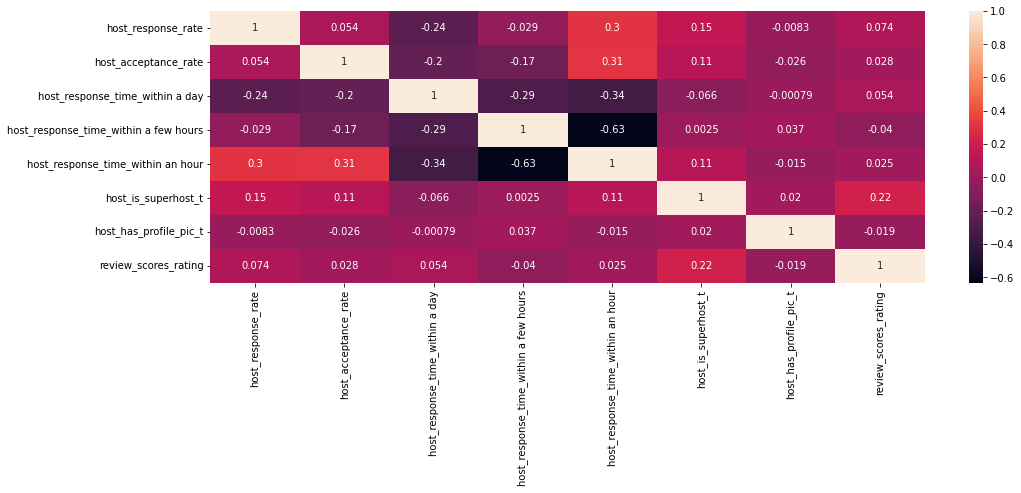

In [20]:
# Modeling
print("==============================All Ratings=================================================")
print(sortedDF.corr())
corr = sortedDF.corr()
plt.figure(figsize = (16,5))
print(sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True))

In [21]:
################Evaluation################
# From the above there is no indication that hosts that reply faster are more keen to receive better reviews.
# Even being a superhost does not seem to affect positively the rating 

In [22]:
######################################################################################################################

In [23]:
################Business understanding - Question 2################
# Does room type and size affects price?

In [24]:
################Data Understanding################
df = pd.read_csv('./Boston-listings.csv')
df.head()
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

In [26]:
################Data preparation################
def clean_data_q2(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['price'], axis=0)
    
    y = df['price']
    y=y.str.replace('[$,]', '')

    #Drop respondent and expected salary columns  
    df = df[['guests_included','property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'host_is_superhost']]

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        
    X = df
    return X, y

#Use the function to create X and y
X, y = clean_data_q2(df) 

/var/folders/nh/b503281s5qj68mghqwwb6xlw0000gn/T/ipykernel_16676/3195673338.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  y=y.str.replace('[$,]', '')


In [15]:
################Modelling################
# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.15, random_state=42)
# pd.set_option("max_rows", None)
lm_2_model = LinearRegression(normalize=True)
# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_train, y_train)
except Exception as e:
    print(e)

# Predictions here
y_test_preds = lm_2_model.predict(X_test)

r2_test = r2_score(y_test, y_test_preds)
print("R2 score =",r2_test)

mse = mean_squared_error(y_test, y_test_preds)
print("Mean Square error score =",mse)

R2 score = 0.15927373042866144
Mean Square error score = 34800.97066377955


/Users/georgekorovesis/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [28]:
################Evaluation################
# Our model accounts for 16% of the variance, so we don't have so good results here again


In [16]:
################Data Preparation################
X,y = clean_data_q2(df) 

# print(y)
y = y.astype(float)
pd.set_option('display.width', 10000)
merged = X.merge(y.to_frame(), left_index=True, right_index=True)

/var/folders/nh/b503281s5qj68mghqwwb6xlw0000gn/T/ipykernel_2649/3194610630.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  y=y.str.replace('[$,]', '')


AxesSubplot(0.125,0.125;0.62x0.755)


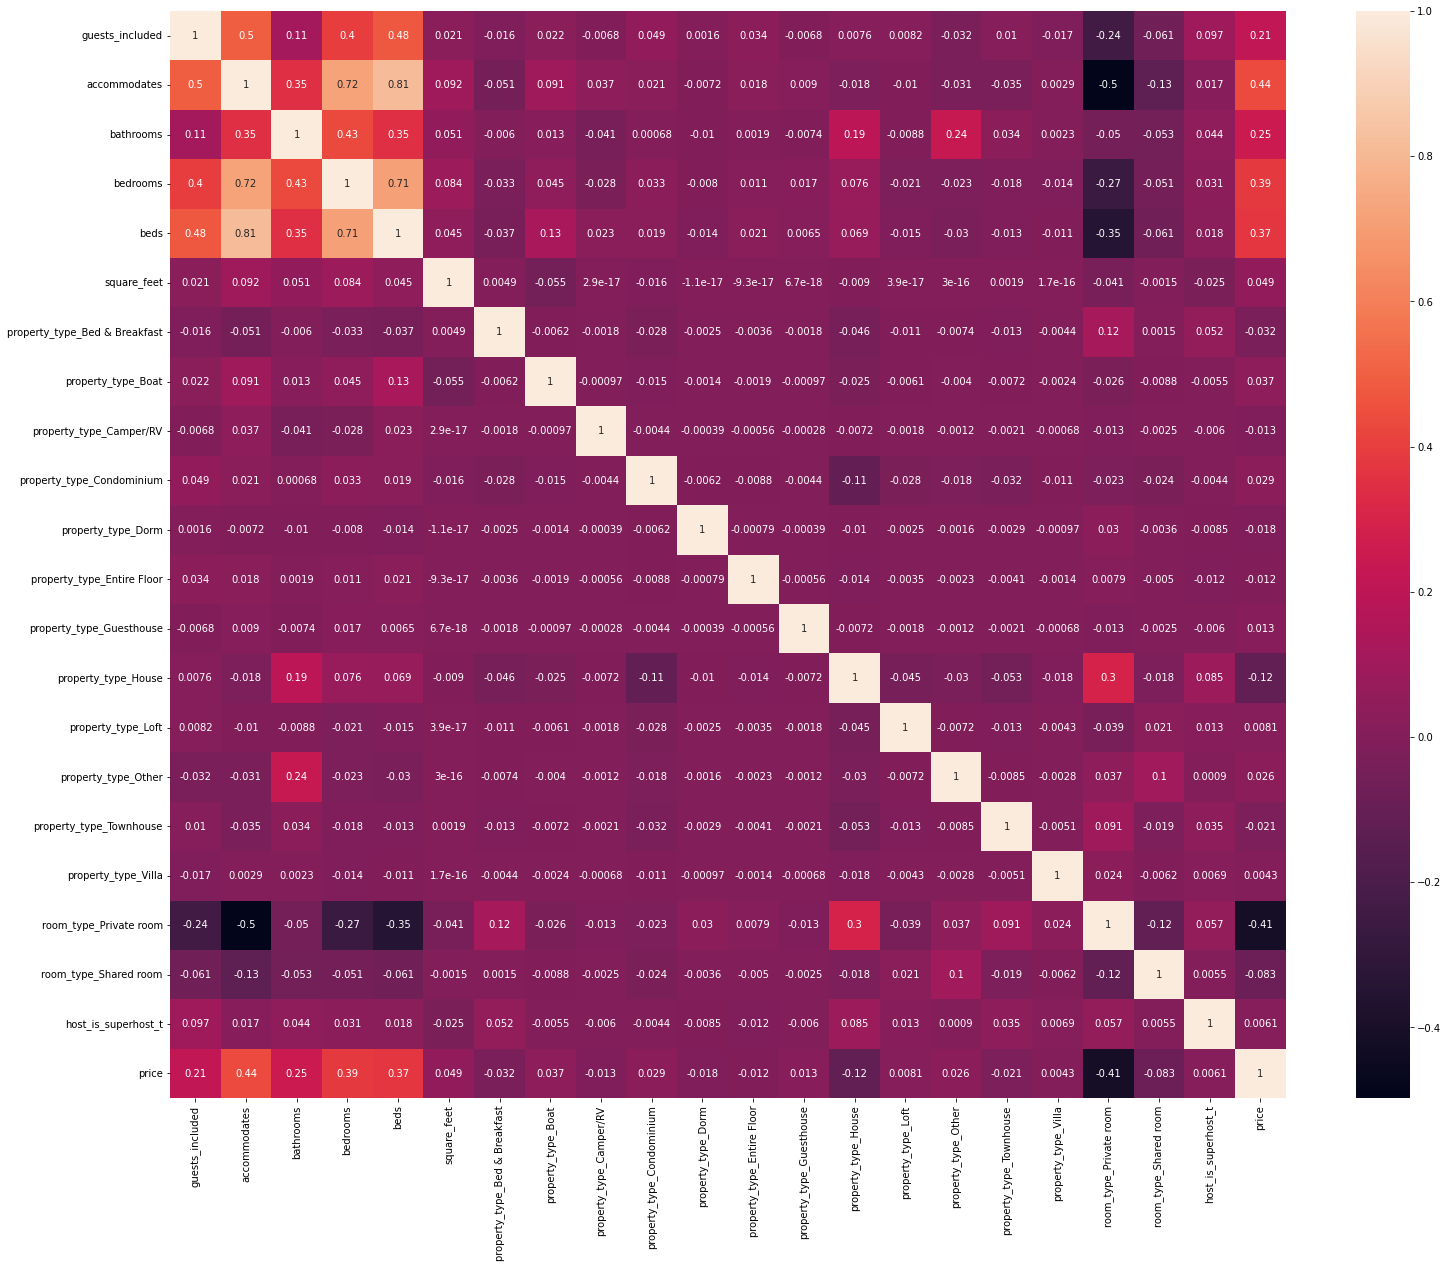

In [17]:
################Modelling################
plt.subplots(figsize=(25,20))
corr = merged.corr()
print(sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True))

In [ ]:
################Evaluation################
# Price seems to be correlated more with number of accomodates, guests, beds, bedrooms and bathrooms.
# On the other hand, there seems to not exist strong correlation between price and factors such 
# as type or size of the property.

In [ ]:
######################################################################################################################

In [ ]:
################Business understanding - Question 3################
# Can some neighborhoods characterized as cheap or expensive?

In [1]:
# Data Understanding
df = pd.read_csv('./Boston-listings.csv')
df.head()
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

NameError: name 'pd' is not defined

In [ ]:
################Data preparation################
df = df[['host_neighbourhood', 'property_type','price']]
df.dropna(subset=['host_neighbourhood'],inplace=True)

df['price']=df['price'].str.replace('[$,]', '')
df['price']=df['price'].astype(float)

df = df.groupby(['host_neighbourhood']).mean().reset_index()
df = df.sort_values(by=['price'],ascending=False)
print(df)
print(df['price'].mean())
print(df['price'].min())
print(df['price'].max())

In [ ]:
################Modelling################
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

chart = sn.barplot(x="host_neighbourhood",y="price",ax=ax,data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [ ]:
################Evaluation################
size = df.shape[0]
print(df[df['price']<150.0].shape[0] / size)
print((df[df['price'].between(150, 250)].shape[0] / size))
print(df[df['price']>250].shape[0] / df.shape[0])
# 15% of the neighbourhoods can be characterized as expensive, 45% as neither 
# expensive nor cheap and the rest 40% as cheap.